This notebook is based on [Quantum Boltzmann Machine (M. H. Amin, et al., 2018)](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.021050).

Code is referenced from [mareksubocz/QRBM](https://github.com/mareksubocz/QRBM).

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

# Dataset Generation

In [110]:
class RandomVectorDataset(Dataset):
    """
    Create a random boolean vector dataset with multiple modes, each centered at a random centerpoint with success probability p.
    """
    def __init__(self, N, modes, p, dataset_size, sd=None):
        super().__init__()

        np.random.seed(sd)
        center_lst = []
        dataset_lst = []
        for mode in range(modes):
            s = np.random.binomial(1, 0.5, N)
            center_lst.append(2*s - 1)
            # dataset_lst.append([])
            for _ in range(dataset_size):
                data = 2*(np.random.binomial(1, p, N) == s) - 1
                # dataset_lst[-1].append(data)
                dataset_lst.append(data)

        self.centers = center_lst
        self.samples = dataset_lst

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [122]:
N = 5
modes = 1
p = 0.9
dataset_size = 100
seed = 0

dataset = RandomVectorDataset(N, modes, p, dataset_size, seed)
dataset.centers

[array([ 1,  1,  1,  1, -1])]

In [123]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=0)

In [159]:
for batch in dataloader:
    print(batch)

tensor([[ 1,  1,  1,  1, -1],
        [ 1,  1,  1, -1, -1],
        [ 1,  1,  1,  1,  1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1, -1,  1, -1],
        [ 1, -1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1, -1,  1,  1,  1],
        [ 1,  1,  1,  1, -1]], dtype=torch.int32)
tensor([[ 1,  1,  1,  1,  1],
        [-1, -1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1]], dtype=torch.int32)
tensor([[ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1, -1,  1,  1,  1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1, -1],
        [ 1,  1,  1,  1,  1],
        [-1,  1,  1,  1, -1]], dtype=torch.int32)
tensor([[ 1,  1,  1,  1, -1],
        [ 

In [124]:
qbm1 = QBM(5, 2, use_tqdm=True)

In [125]:
qbm1.train(dataset)

Batch: 1/10


100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


Batch: 2/10


100%|██████████| 10/10 [00:03<00:00,  2.80it/s]


Batch: 3/10


100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


Batch: 4/10


100%|██████████| 10/10 [00:03<00:00,  2.85it/s]


Batch: 5/10


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


Batch: 6/10


100%|██████████| 10/10 [00:03<00:00,  2.92it/s]


Batch: 7/10


100%|██████████| 10/10 [00:03<00:00,  2.75it/s]


Batch: 8/10


100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


Batch: 9/10


100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


Batch: 10/10


100%|██████████| 10/10 [00:03<00:00,  2.75it/s]


In [132]:
sample_states = []
for _ in range(100):
    sample_states.append(np.sign(qbm1.sample(qbm1.w, qbm1.b, num=1)[:-2]))

In [156]:
histo_cat = []
histo_data = []
for v in sample_states:
    for s in histo_cat:
        if  s == str(v):
            histo_data[histo_cat.index(s)] += 1
            break
    else:
        histo_cat.append(str(v))
        histo_data.append(1)

<BarContainer object of 3 artists>

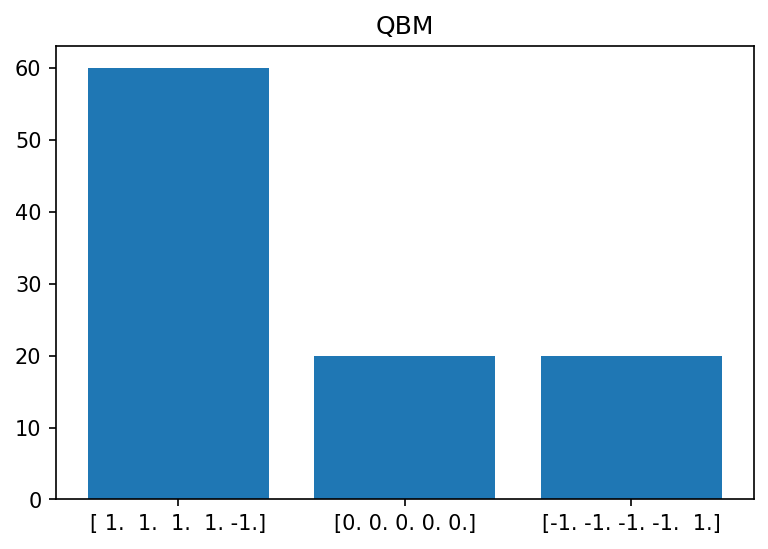

In [162]:
plt.figure(dpi=150)
plt.title('QBM')
plt.bar(histo_cat, histo_data)

In [160]:
srqbm1 = SRQBM(5, 2)

In [161]:
srqbm1.train(dataset)

100%|██████████| 10/10 [00:23<00:00,  2.40s/it]


In [166]:
sample_states = []
for _ in range(100):
    sample_states.append(np.sign(srqbm1.sample(srqbm1.w, srqbm1.b, num=1)[:-2]))

In [167]:
histo_cat = []
histo_data = []
for v in sample_states:
    for s in histo_cat:
        if  s == str(v):
            histo_data[histo_cat.index(s)] += 1
            break
    else:
        histo_cat.append(str(v))
        histo_data.append(1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

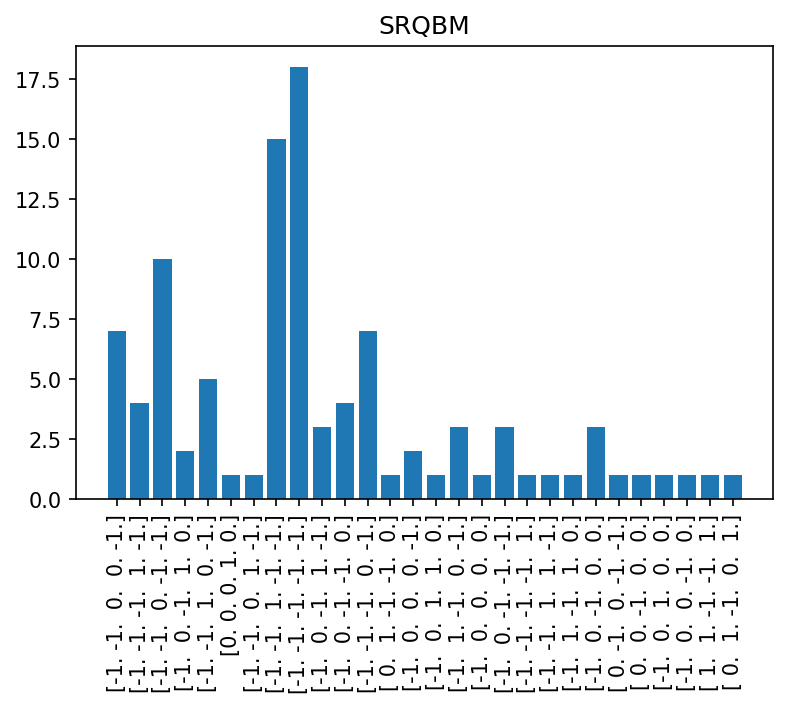

In [169]:
plt.figure(dpi=150)
plt.title('SRQBM')
plt.bar(histo_cat, histo_data)
plt.xticks(rotation='vertical')

# Quantum Boltzmann Machine

In [104]:
class QBM:
    """
    A general quantum Boltzmann machine class. No restrictions on the connection between nodes.
    Variables are binary (\pm 1).
    """
    def __init__(self,
                 n_vis,
                 n_hid,
                 sampler='QMC',
                 Gamma=0.1,
                 err_function='mse',
                 use_tqdm=True):

        # if err_function not in {'mse', 'cosine'}:
        #     raise ValueError('err_function should be either \'mse\' or \'cosine\'')

        # progress bar
        # self._use_tqdm = use_tqdm
        # self._tqdm = None

        if use_tqdm:
            from tqdm import tqdm
            self._tqdm = tqdm
        else:
            self._tqdm = lambda x: x

        self.n_vis = n_vis
        self.n_hid = n_hid
        self.n = n_vis + n_hid
        self.sampler = sampler
        self.Gamma = Gamma

        # Convention:
        # varibales 0 to (n_vis - 1) represent visible nodes;
        # variables n_vis to (n - 1) represent hidden nodes;
        # energy = -w_v.dot(visible).dot(visible) - w_h.dot(hidden).dot(hidden) - 2 * w_vh.dot(visible).dot(hidden)
        #        = -w.dot(nodes).dot(nodes) - b.dot(nodes)
        # self.w_v = np.random.uniform(-1, 1, (self.n_vis, self.n_vis))
        # self.w_v = 0.5 * (self.w_v + self.w_v.T)
        # self.w_h = np.random.uniform(-1, 1, (self.n_hid, self.n_hid))
        # self.w_h = 0.5 * (self.w_h + self.w_h.T)
        # self.w_vh = np.random.uniform(-1, 1, (self.n_vis, self.n_hid))
        self.w = np.random.uniform(-1, 1, (self.n, self.n))
        self.w = 0.5 * (self.w + self.w.T) # symmetric
        np.fill_diagonal(self.w, 0)
        self.b = np.random.uniform(-1, 1, self.n)

        self.n_epoch = 0

    def get_weights(self):
        return self.w, self.b

    def set_weights(self, w, b):
        self.w = 0.5 * (w + w.T)
        self.b = b

    def get_Z(self): # in construction
        """
        Return the canonical partition function
        """
        Z = np.sum(np.exp(-self.energies))
        self.Z = Z
        return Z

    def get_energy(self, state):
        """
        Return the energy associated with a state
        """
        return -self.w.dot(state).dot(state) - self.b.dot(state)

    def sample(self, w, h, num=10, Gamma0=5, M=10, T=0.05):
        """
        Sample from the Boltzmann distribution of energy = -w.dot(state).dot(state) - h.dot(state) and average them out
        """
        if self.sampler == 'QMC' or self.sampler == 'SQA':
            from sqa import one_SQA_run
            
            trans_fld_sched = np.linspace(Gamma0, self.Gamma, num=100)

            results = []
            for _ in range(num):
                results.append(one_SQA_run(-w, -h, trans_fld_sched, M, T))
            
            return np.sum(np.reshape(np.array(results), (num * M, -1)), axis=0) / num / M

    def train(self, training_dataset, epochs=1, batches=10, lr=0.11, lr_decay=0.1, epoch_drop=None):
        """
        Minimizes the upper bound of likelihood function.
        Updates after each batch. Runs over the whole dataset after each epoch.
        """
        # learning_curve_plot = []
        batch_size = len(training_dataset) // batches
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

        # if epoch_drop is None:
        #     epoch_drop = epochs // 5

        # for batch in training_data.shuffle(len(training_data), reshuffle_each_iteration=True).repeat(epochs).batch(batch_size):
        for batch_id, batch in enumerate(dataloader):
            print(f'Batch: {batch_id + 1}/{batches}')
            pos_phase_w = np.zeros((self.n, self.n))
            pos_phase_b = np.zeros(self.n)
            for data in self._tqdm(batch): # parallelizable
                # offset = self.w[:self.n_vis, :self.n_vis].dot(data).dot(data) + self.b[:self.n_vis].dot(data)
                b_eff = 2 * self.w[self.n_vis:, :self.n_vis].dot(data) + self.b[self.n_vis:]
                J_eff = self.w[self.n_vis:, self.n_vis:]

                samp = np.append(data, self.sample(J_eff, b_eff))
                outer_avg = np.outer(samp, samp)
                np.fill_diagonal(outer_avg, 0)

                pos_phase_w += outer_avg / batch_size
                pos_phase_b += samp / batch_size
                
            samp = self.sample(self.w, self.b)
            outer_avg = np.outer(samp, samp)
            np.fill_diagonal(outer_avg, 0)
            neg_phase_w = outer_avg
            neg_phase_b = samp

            self.w += lr * (pos_phase_w - neg_phase_w)
            self.b += lr * (pos_phase_b - neg_phase_b)

            # if epoch % epoch_drop == (epoch_drop - 1):
                
            #     sample_v = v
            #     prob_sample_h = sigmoid(self.hidden_bias + np.dot(v, self.w))
            #     sample_h = (np.random.rand(len(self.hidden_bias)) < prob_sample_h).astype(int)
            #     prob_sample_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
            #     sample_output = (np.random.rand(len(self.visible_bias)) < prob_sample_v_out).astype(int)
            #     learning_curve_plot.append(np.sum((np.array(v) - np.array(sample_output)) ** 2))

            #     #learning_rate_decay
            #     lr *= (1 - lr_decay)
            #     print("lr = ", lr)

        # plt.figure()
        # plt.plot(learning_curve_plot)
        # plt.xlabel('epoch')
        # plt.ylabel('normalised MSE')
        # plt.show()
        return

    # def generate(self, test_img=None): # just use sample
    #     sample_v = []
    #     if test_img == None:
    #         sample_v = (np.random.rand(len(self.visible_bias)) < self.visible_bias).astype(int)
    #         # print("sample_v: ", sample_v)
    #         # print("visible_bias: ", self.visible_bias)
    #     else:
    #         sample_v = test_img
    #     prob_h = sigmoid(self.hidden_bias + np.dot(sample_v, self.w))
    #     sample_h = (np.random.rand(len(self.hidden_bias)) < prob_h).astype(int)

    #     prob_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
    #     v_out = (np.random.rand(len(self.visible_bias)) < prob_v_out).astype(int)

    #     return v_out

    # def evaluate(self, result, test_img=None):
    #     # sample_output = self.generate(test_img=test_img)
    #     min_sum = 1000000
    #     for pic in self.result_picture_tab:
    #         new_sum = np.sum((np.array(result) - np.array(pic)) ** 2)
    #         if new_sum < min_sum:
    #             min_sum = new_sum

    #     return min_sum

In [99]:
class SRQBM(QBM): # in construction
    """
    A semi-restricted quantum Boltzmann machine subclass. Connections in the hidden layer are forbidden.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.w[self.n_vis:, self.n_vis:] = 0 # w in the hidden layer is forbidden

    def train(self, training_dataset, epochs=1, batches=10, lr=0.11, lr_decay=0.1, epoch_drop=None):
        """
        Minimize the upper bound of likelihood function.
        Updates after each batch. Runs over the whole dataset after each epoch.
        """
        # learning_curve_plot = []
        batch_size = len(training_dataset) // batches
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

        # if epoch_drop is None:
        #     epoch_drop = epochs // 5

        for batch in self._tqdm(dataloader):
            pos_phase_w = np.zeros((self.n, self.n))
            pos_phase_b = np.zeros(self.n)
            for data in batch: # parallelizable
                b_eff = 2 * self.w[self.n_vis:, :self.n_vis].dot(data) + self.b[self.n_vis:] # for hidden units
                D = np.sqrt(self.Gamma**2 + b_eff**2)

                avg = np.append(data, b_eff/D * np.tanh(D))
                outer_avg = np.outer(avg, avg)
                np.fill_diagonal(outer_avg, 0)

                pos_phase_w += outer_avg / batch_size
                pos_phase_b += avg / batch_size
                
            samp = self.sample(self.w, self.b)
            outer_avg = np.outer(samp, samp)
            np.fill_diagonal(outer_avg, 0)
            neg_phase_w = outer_avg
            neg_phase_b = samp

            self.w += lr * (pos_phase_w - neg_phase_w)
            self.b += lr * (pos_phase_b - neg_phase_b)
            self.w[self.n_vis:, self.n_vis:] = 0 # w in the hidden layer is forbidden

            # if epoch % epoch_drop == (epoch_drop - 1):
                
            #     sample_v = v
            #     prob_sample_h = sigmoid(self.hidden_bias + np.dot(v, self.w))
            #     sample_h = (np.random.rand(len(self.hidden_bias)) < prob_sample_h).astype(int)
            #     prob_sample_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
            #     sample_output = (np.random.rand(len(self.visible_bias)) < prob_sample_v_out).astype(int)
            #     learning_curve_plot.append(np.sum((np.array(v) - np.array(sample_output)) ** 2))

            #     #learning_rate_decay
            #     lr *= (1 - lr_decay)
            #     print("lr = ", lr)

        # plt.figure()
        # plt.plot(learning_curve_plot)
        # plt.xlabel('epoch')
        # plt.ylabel('normalised MSE')
        # plt.show()
        return

    # def generate(self, test_img=None):
    #     sample_v = []
    #     if test_img == None:
    #         sample_v = (np.random.rand(len(self.visible_bias)) < self.visible_bias).astype(int)
    #         # print("sample_v: ", sample_v)
    #         # print("visible_bias: ", self.visible_bias)
    #     else:
    #         sample_v = test_img
    #     prob_h = sigmoid(self.hidden_bias + np.dot(sample_v, self.w))
    #     sample_h = (np.random.rand(len(self.hidden_bias)) < prob_h).astype(int)

    #     prob_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
    #     v_out = (np.random.rand(len(self.visible_bias)) < prob_v_out).astype(int)

    #     return v_out

    # def evaluate(self, result, test_img=None):
    #     # sample_output = self.generate(test_img=test_img)
    #     min_sum = 1000000
    #     for pic in self.result_picture_tab:
    #         new_sum = np.sum((np.array(result) - np.array(pic)) ** 2)
    #         if new_sum < min_sum:
    #             min_sum = new_sum

    #     return min_sum

def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result

class classicalRBM:
    def __init__(self,
                 n_vis,
                 n_hid,
                 err_function='mse',
                 use_tqdm=True,
                 tqdm=None):

        if err_function not in {'mse', 'cosine'}:
            raise ValueError('err_function should be either \'mse\' or \'cosine\'')

        self._use_tqdm = use_tqdm
        self._tqdm = None

        if use_tqdm or tqdm is not None:
            from tqdm import tqdm
            self._tqdm = tqdm

        self.n_vis = n_vis
        self.n_hid = n_hid

        self.w = (np.random.rand(self.n_vis, self.n_hid) * 2 - 1) * 1
        self.visible_bias = (np.random.rand(self.n_vis) * 2 - 1) * 1
        self.hidden_bias = (np.random.rand(self.n_hid) * 2 - 1) * 1

        self.n_epoch = 0

    def get_weights(self):
        return self.w, \
               self.visible_bias, \
               self.hidden_bias

    def set_weights(self, w, visible_bias, hidden_bias):
        self.w = w
        self.visible_bias = visible_bias
        self.hidden_bias = hidden_bias

    def get_Z(self):
        Z = np.sum(np.exp(-1 * self.energies))
        self.Z = Z
        return Z

    def train(self, training_data, len_x=1, len_y=1, epochs=1, lr=0.11, lr_decay=0.1, epoch_drop = None):
        """
            maximize the product of probabilities assigned to some training set V
            optimize the weight vector

            single-step contrastive divergence (CD-1):
            1. Take a training sample v,
                compute the probabilities of the hidden units and
                sample a hidden activation vector h from this probability distribution.
            2. Compute the outer product of v and h and call this the positive gradient.
            3. From h, sample a reconstruction v' of the visible units,
                then resample the hidden activations h' from this. (Gibbs sampling step)
            4. Compute the outer product of v' and h' and call this the negative gradient.
            5. Let the update to the weight matrix W be the positive gradient minus the negative gradient,
                times some learning rate
            6. Update the biases a and b analogously: a=epsilon (v-v'), b=epsilon (h-h')

            https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine
        """
        learning_curve_plot = []
        if epoch_drop == None:
            epoch_drop = epochs / 5

        for epoch in self.tqdm(range(epochs)):
            # single step
            # print("Training data len", len(training_data))

            # 1
            # 1.1 Take a training sample v
            random_selected_training_data_idx = epoch % len(training_data)
            # print("selected_training_data_idx: ", random_selected_training_data_idx)

            v = training_data[random_selected_training_data_idx]
            # print("v: ", v)

            # # 1.2 compute the probabilities of the hidden units
            prob_h = sigmoid(self.hidden_bias + np.dot(v, self.w))

            # h należy teraz wysamplować z tych wartości prawdopodobieństw
            #klasycznie mogę to zrobić tak:
            # print("self.hidden_bias: ", self.hidden_bias)
            # print("np.dot(v, self.w): ", np.dot(v, self.w))
            # print("self.hidden_bias + np.sum(np.dot(v, self.w)): ", self.hidden_bias + np.dot(v, self.w))
            # print("prob_h: ", prob_h)
            h = (np.random.rand(len(self.hidden_bias)) < prob_h).astype(int)
            # print("h: ", h)

            # 2 Compute the outer product of v and h and call this the positive gradient.
            pos_grad = np.outer(v, h)
            # print("pos_grad:", pos_grad)

            # 3
            # 3.1 From h, sample a reconstruction v' of the visible units,
            prob_v_prim = sigmoid(self.visible_bias + np.dot(h, self.w.T))
            #znów klasycznie
            v_prim = (np.random.rand(len(self.visible_bias)) < prob_v_prim).astype(int)
            # print("v_prim: ", v_prim)

            # 3.2 then resample the hidden activations h' from this. (Gibbs sampling step)
            prob_h_prim = sigmoid(self.hidden_bias + np.dot(v_prim, self.w))
            # h należy teraz wysamplować z tych wartości prawdopodobieństw
            # klasycznie mogę to zrobić tak:
            h_prim = (np.random.rand(len(self.hidden_bias)) < prob_h_prim).astype(int)
            # print("h_prim: ", h_prim)

            # 4 Compute the outer product of v' and h' and call this the negative gradient.
            neg_grad = np.outer(v_prim, h_prim)
            # print("neg_grad:", neg_grad)

            # 5 Let the update to the weight matrix W be the positive gradient minus the negative gradient,
            #        times some learning rate
            self.w += lr * (pos_grad - neg_grad)
            # print("w: ", self.w)

            # 6 Update the biases a and b analogously: a=epsilon (v-v'), b=epsilon (h-h')
            self.visible_bias += lr * (np.array(v) - np.array(v_prim))
            self.hidden_bias += lr * (np.array(h) - np.array(h_prim))
            # print("visible_bias: ", self.visible_bias)
            # print("hidden_bias: ", self.hidden_bias)

            if epoch % epoch_drop == (epoch_drop - 1):
                # krzywa uczenia
                sample_v = v
                prob_sample_h = sigmoid(self.hidden_bias + np.dot(v, self.w))
                sample_h = (np.random.rand(len(self.hidden_bias)) < prob_sample_h).astype(int)
                prob_sample_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
                sample_output = (np.random.rand(len(self.visible_bias)) < prob_sample_v_out).astype(int)
                learning_curve_plot.append(np.sum((np.array(v) - np.array(sample_output)) ** 2))

                #learning_rate_decay
                lr *= (1 - lr_decay)
                print("lr = ", lr)


        # koniec
        plt.figure()
        plt.plot(learning_curve_plot)
        plt.xlabel('epoch')
        plt.ylabel('normalised MSE')
        plt.show()
        return

    def generate(self, test_img=None):
        sample_v = []
        if test_img == None:
            sample_v = (np.random.rand(len(self.visible_bias)) < self.visible_bias).astype(int)
            # print("sample_v: ", sample_v)
            # print("visible_bias: ", self.visible_bias)
        else:
            sample_v = test_img
        prob_h = sigmoid(self.hidden_bias + np.dot(sample_v, self.w))
        sample_h = (np.random.rand(len(self.hidden_bias)) < prob_h).astype(int)

        prob_v_out = sigmoid(self.visible_bias + np.dot(sample_h, self.w.T))
        v_out = (np.random.rand(len(self.visible_bias)) < prob_v_out).astype(int)

        return v_out

    def evaluate(self, result, test_img=None):
        # sample_output = self.generate(test_img=test_img)
        min_sum = 1000000
        for pic in self.result_picture_tab:
            new_sum = np.sum((np.array(result) - np.array(pic)) ** 2)
            if new_sum < min_sum:
                min_sum = new_sum

        return min_sum